       VG  BG            IG           ISS           IDD         I_NET
0   -3.00   0 -3.900000e-14  8.500000e-14 -1.580000e-13 -1.120000e-13
1   -2.94   0 -8.500000e-14 -7.600000e-14 -1.750000e-13 -3.360000e-13
2   -2.88   0 -1.510000e-13 -4.200000e-14  3.300000e-14 -1.600000e-13
3   -2.82   0 -4.500000e-14  6.300000e-14  6.000000e-14  7.800000e-14
4   -2.76   0  2.300000e-14 -4.900000e-14 -1.900000e-14 -4.500000e-14
..    ...  ..           ...           ...           ...           ...
96   2.76   0 -3.000000e-15 -6.412850e-07  6.414330e-07  1.479970e-10
97   2.82   0  5.100000e-14 -6.642860e-07  6.643180e-07  3.205100e-11
98   2.88   0 -1.400000e-14 -6.873920e-07  6.873140e-07 -7.801400e-11
99   2.94   0  1.000000e-15 -7.104340e-07  7.106590e-07  2.250010e-10
100  3.00   0  7.800000e-14 -7.340910e-07  7.340300e-07 -6.092200e-11

[101 rows x 6 columns]
Vth @ log10(|IDD|)=-10 : 0.2971366422508427


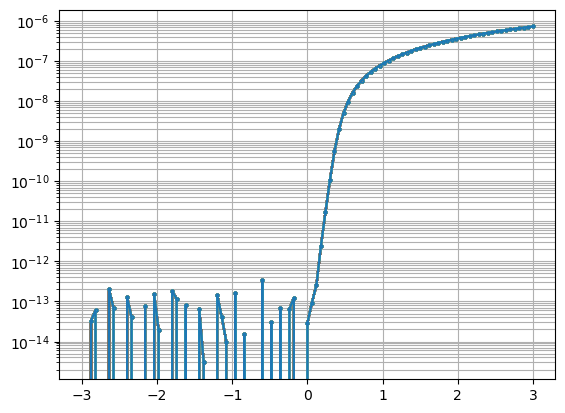

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# b1500a vg vs id 그래프 그리기

df = pd.read_csv('lower.csv', sep = ',',skiprows = 257)
df = df.iloc[:,1:]
row_count = df.shape[0]
df.columns = df.columns.str.strip()   

print(df)

plt.figure()
for row in range(row_count):
    plt.semilogy(df['VG'],df['IDD'],marker = 'o',markerfacecolor = 'none',markersize = 2 )

plt.grid(True, which = 'both')

target = -10  # log10(|IDD|) 목표값

# 숫자 변환
df['VG']  = pd.to_numeric(df['VG'], errors='coerce')
df['IDD'] = pd.to_numeric(df['IDD'], errors='coerce')

# 유효 데이터만
d = df.dropna(subset=['VG','IDD']).copy()
d = d.sort_values('VG')

# 로그전류 (로그축이므로 절댓값 사용; IDD가 음수면 그대로는 로그 불가)
logI = np.log10(np.abs(d['IDD'].to_numpy()))
VG   = d['VG'].to_numpy()

# target=-10을 "가로지르는" 구간 찾기 (부호가 바뀌는 인덱스)
diff = logI - target
cross_idx = np.where(diff[:-1] * diff[1:] <= 0)[0]   # 인접 두 점이 target을 사이에 둠

if len(cross_idx) == 0:
    print("target log(idd)=-10을 가로지르는 구간이 없습니다. (데이터 범위 확인 필요)")
else:
    i = cross_idx[0]  # 첫 번째 crossing 사용 (원하면 다른 crossing 선택 가능)

    x0, x1 = VG[i], VG[i+1]
    y0, y1 = logI[i], logI[i+1]

    # 선형 보간: y(target)에서의 x(VG)
    vth = x0 + (target - y0) * (x1 - x0) / (y1 - y0)

    print("Vth @ log10(|IDD|)=-10 :", vth)
